In [1]:
# Munk sound speed example, no bottom
import numpy as np
import matplotlib.pyplot as plt
from math import pi

from pype import solve_pe, solve_pe_energy

In [2]:
# ******************************************************
# PE
# ******************************************************

# *** set up Munk SSP ***

zs = 1000.0 # source depth
f = 50
eps = 0.00737
c0 = 1500.

d = 5000  # bottom depth
nz = 250  # number of finite-difference points
h = d / nz
z = np.linspace( 0, d, nz )  # grid coordinates

x = 2 * ( z - 1300 ) / 1300
c = c0 * (1 + eps * (x - 1 + np.exp(-x)))
rho = np.ones_like(c)


In [3]:
# ******************************************************
# Gaussian starter
# ******************************************************

# \psi(0,z) = \sqrt{ k_0 } \,
# e^{ -{ k_0^2 \over 2 } ( z - z_s )^2 } (6.100)

k0 = 2 * pi * f / c0
zs = 1000.0
isd = zs / d * nz

nr     = 2000
rmax   = 100000.0
deltar = rmax / nr
r = np.linspace( 0.0, rmax, nr )

# we have broadened the Gaussian to make it more
# narrow angle
# the usual formula has fac = 1
fac = 10
psi_start = np.sqrt(k0 / fac) * np.exp(-( k0 / fac) ** 2 \
          * ((z - zs * np.ones(nz))) ** 2 )

In [4]:
#psi = solve_pe(psi_start, f, c, c0, rho, h, deltar, nr)
psi = solve_pe_energy(psi_start, f, c, c0, rho, h, deltar, nr)

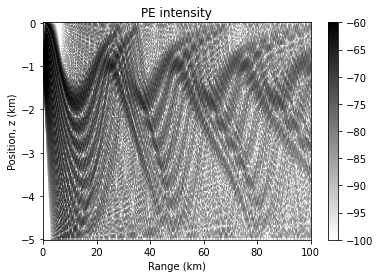

In [5]:
hank = np.sqrt(2 / (pi * k0)) * np.exp(1j * ( k0 * r - pi / 4)) \
     * 1.0 / np.sqrt(r + np.spacing(1))

tl = 20 * np.log10(np.abs(psi * hank[:, None]) + np.spacing(1))

fig, ax = plt.subplots()
cm = ax.pcolormesh(r / 1e3, -z / 1e3, tl.T, vmax=-60, vmin=-100, cmap=plt.cm.gray_r)

fig.colorbar(cm)
_ = ax.set_xlabel( 'Range (km)' )
_ = ax.set_ylabel( 'Position, z (km)' )
_ = ax.set_title('PE intensity')